In [1]:
import os
import matplotlib.pyplot as plt
import potion.visualization.notebook_utils as nu

# CARTPOLE (non-safe)

seeds = [2030, 4473, 5759, 5756, 4146, 1428, 9723, 3212, 8589, 1971]

In [2]:
os.chdir('/home/matteo/policy-optimization/results/sepg/cartpole_unsafe')

* sigmainit = 0.5

LOWGPOMDPf: 513.957082 +- 2.389004
LOWNAIVEf: 118.767167 +- 0.486611
LOWMEPGf: 784.694725 +- 15.678193
entropyf: 462.442925 +- 3.396191


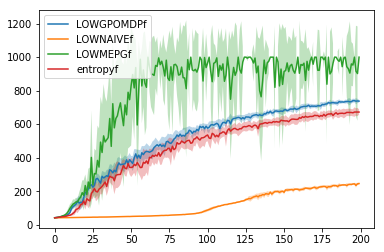

LOWGPOMDPf: 0.500000 +- 0.000000
LOWNAIVEf: 0.432797 +- 0.009976
LOWMEPGf: 1.971546 +- 0.059446
entropyf: 0.536258 +- 0.026111


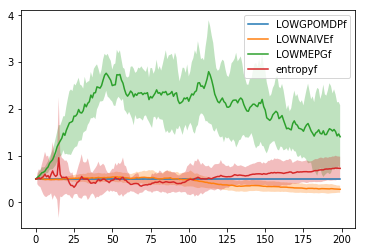

In [15]:
nu.compare('contcartpole', 
           ['LOWGPOMDPf', 'LOWNAIVEf', 'LOWMEPGf', 'entropyf'], 
           keys=['UPerf', 'Exploration'], 
           separate=False,
           conf=.99)

In [18]:
nu.save_csv('contcartpole', 'LOWGPOMDPf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'LOWNAIVEf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'LOWMEPGf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'entropyf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'LOWGPOMDPf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'LOWNAIVEf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'LOWMEPGf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'entropyf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')

highmepglong: 952.809166 +- 3.783763


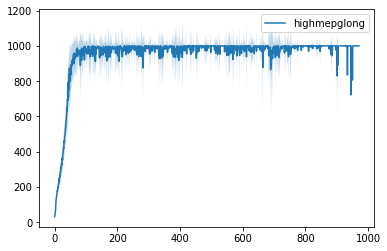

highmepglong: 2.656685 +- 0.030050


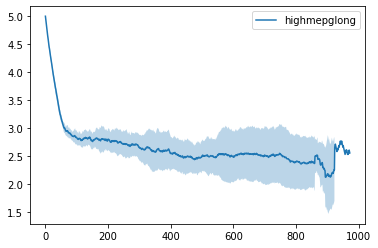

In [5]:
nu.compare('contcartpole', 
           ['highmepglong'], 
           keys=['UPerf', 'Exploration'], 
           separate=False, nrows=1000,
           conf=.99)

In [6]:
nu.save_csv('contcartpole', 'highmepglong', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots', rows=1000)
nu.save_csv('contcartpole', 'highmepglong', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots', rows=1000)

* sigmainit = 5.0

HIGHGPOMDPf: 469.803943 +- 20.427018
HIGHNAIVEf: 98.086065 +- 0.405403
HIGHMEPGf: 825.397792 +- 6.147653
highentropyf: 448.682524 +- 6.523741


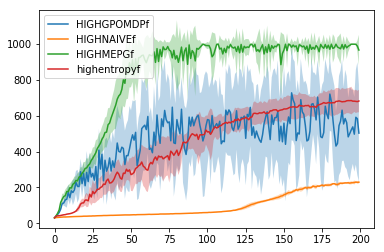

HIGHGPOMDPf: 5.000000 +- 0.000000
HIGHNAIVEf: 1.196718 +- 0.015471
HIGHMEPGf: 3.130970 +- 0.013477
highentropyf: 0.573486 +- 0.032415


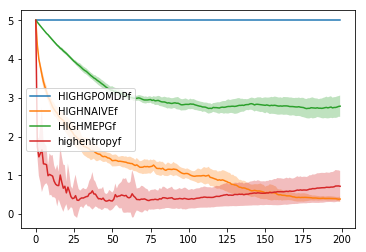

In [19]:
nu.compare('contcartpole', 
           ['HIGHGPOMDPf', 'HIGHNAIVEf', 'HIGHMEPGf', 'highentropyf'], 
           keys=['UPerf', 'Exploration'], 
           separate=False,
           conf=.99)

In [20]:
nu.save_csv('contcartpole', 'HIGHGPOMDPf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'HIGHNAIVEf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'HIGHMEPGf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'highentropyf', 'UPerf', path='/home/matteo/budget_paper/AISTATS2020/plots')

nu.save_csv('contcartpole', 'HIGHGPOMDPf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'HIGHNAIVEf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'HIGHMEPGf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')
nu.save_csv('contcartpole', 'highentropyf', 'Exploration', path='/home/matteo/budget_paper/AISTATS2020/plots')